In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
##pip install shap

In [3]:
import shap
print(shap.__version__)

0.47.2


In [4]:
df=pd.read_csv(r"C:\Users\dzinyela_1\Downloads\Zakari\Personal_Household_USE.csv")

In [5]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,3,2500,300,0,0,41,0,0,3,0,1,0,0,0,1,1,1,1,1,0,0,2,0,0
1,3,2500,300,0,1,51,1,0,3,0,1,0,1,0,1,1,1,2,1,0,0,1,0,0
2,3,2500,300,0,1,15,0,0,7,2,2,0,1,0,1,1,1,0,0,1,2,1,0,0
3,3,7000,500,1,0,51,0,0,3,0,1,0,1,1,1,1,1,1,2,0,1,0,0,0
4,3,7000,500,1,1,22,0,0,8,0,3,0,1,1,0,1,1,2,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,3,2500,250,0,0,41,0,0,1,0,3,0,1,1,0,0,1,0,0,2,1,1,0,1
4614,3,1500,70,0,0,31,0,0,3,0,1,0,0,0,0,0,0,0,1,2,1,0,1,0
4615,3,1500,70,0,0,15,0,0,7,1,1,0,2,0,0,0,1,0,0,2,1,1,1,0
4616,3,1500,70,0,1,41,1,0,3,0,1,0,1,0,0,0,0,0,2,1,1,0,1,0


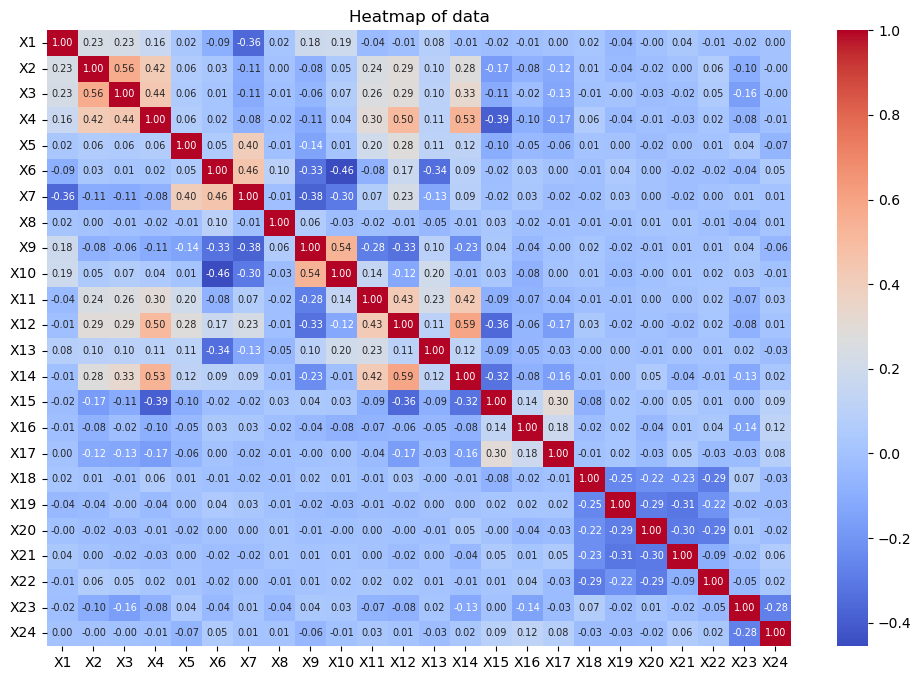

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f",  annot_kws={"size": 7})
plt.title("Heatmap of data")
plt.show()

## Random forest

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [9]:
## attribute X and y values from df

X=df.drop('X17',axis=1) 
y=df['X17'].values

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [11]:
# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_probs = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)


In [12]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_probs):.4f}")

Confusion Matrix:
[[   9  100]
 [   8 1038]]

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.08      0.14       109
           1       0.91      0.99      0.95      1046

    accuracy                           0.91      1155
   macro avg       0.72      0.54      0.55      1155
weighted avg       0.88      0.91      0.87      1155

AUC Score: 0.8224


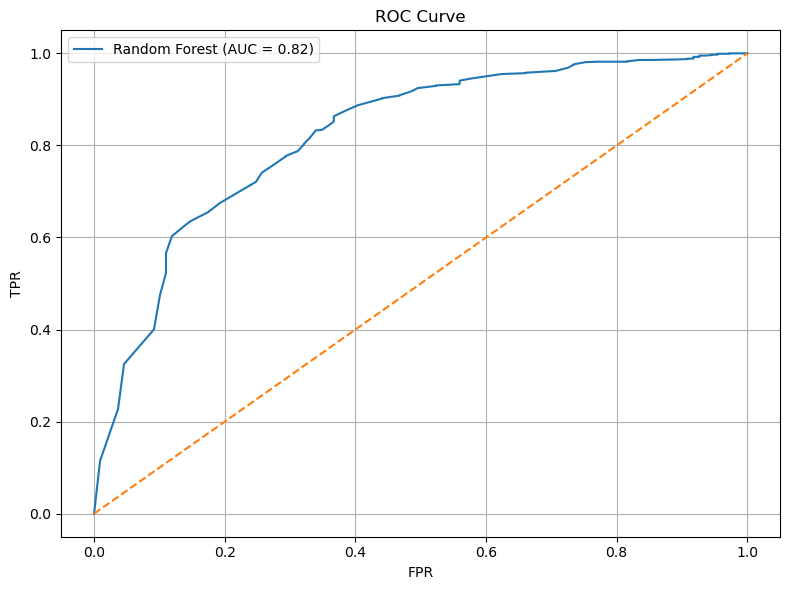

In [13]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_probs)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

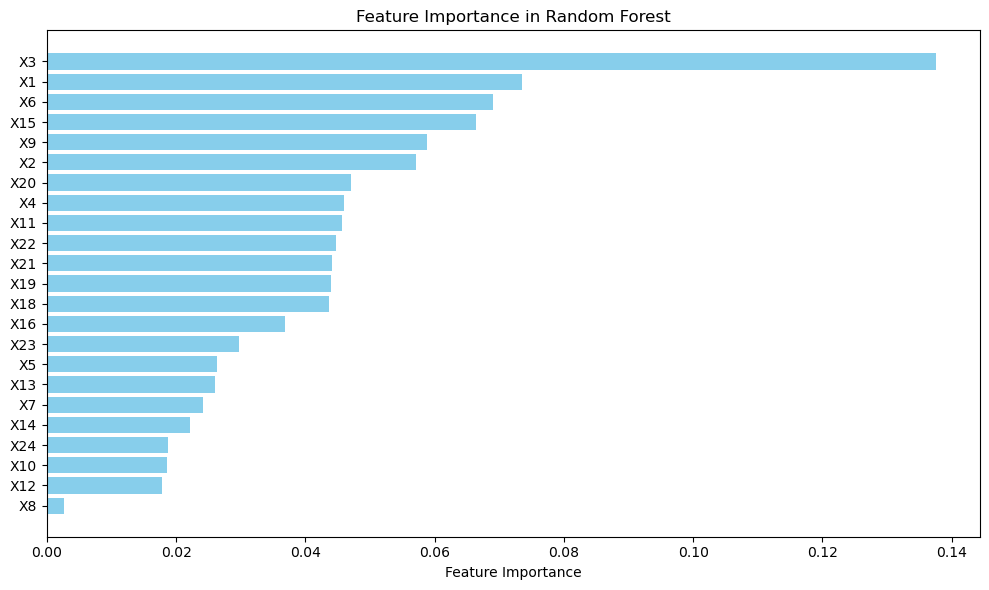

In [14]:
# Feature Importance
feature_importance = rf.feature_importances_

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


In [15]:
# Initialize SHAP Explainer
explainer = shap.TreeExplainer(rf)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)


In [16]:
shap.plots.beeswarm(shap_values)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.